# Project 4

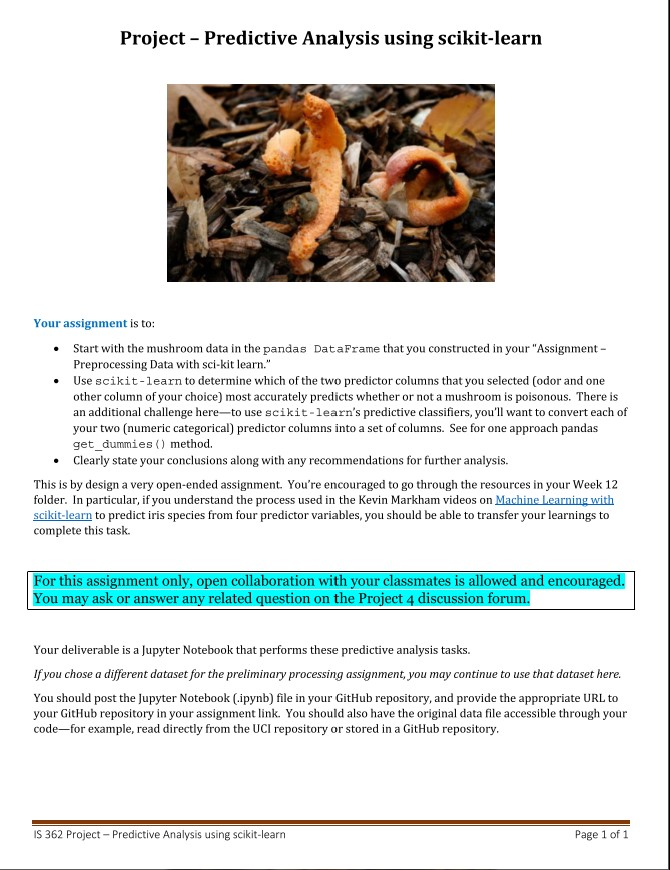

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Start with the mushroom data in the pandas DataFrame that you constructed in your “Assignment – Preprocessing Data with sci-kit learn.”

In [2]:
mushroom_data = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',sep=',', header=None, usecols=[0,3,5], names=['Edibility','Cap_Color','Odor'])
mushroom_data 

,Edibility,Cap_Color,Odor
0,p,n,p
1,e,y,a
2,e,w,l
3,p,w,p
4,e,g,n
...,...,...,...
8119,e,n,n
8120,e,n,n
8121,e,n,n
8122,p,n,y


In [3]:
# found different method to convert codes to nominal values than that was used in Assignment 12 
labelencoder=LabelEncoder()
for column in mushroom_data.columns:
    mushroom_data[column] = labelencoder.fit_transform(mushroom_data[column])
mushroom_data

,Edibility,Cap_Color,Odor
0,1,4,6
1,0,9,0
2,0,8,3
3,1,8,6
4,0,3,5
...,...,...,...
8119,0,4,5
8120,0,4,5
8121,0,4,5
8122,1,4,8


### Use scikit-learn to determine which of the two predictor columns that you selected (odor and one other column of your choice) most accurately predicts whether or not a mushroom is poisonous. There is an additional challenge here—to use scikit-learn’s predictive classifiers, you’ll want to convert each of your two (numeric categorical) predictor columns into a set of columns. See for one approach pandas get_dummies() method

In [4]:
attributes = ['Cap_Color', 'Odor']
dummy = pd.get_dummies(data = mushroom_data, columns=attributes)
dummy


,Edibility,Cap_Color_0,Cap_Color_1,Cap_Color_2,Cap_Color_3,Cap_Color_4,Cap_Color_5,Cap_Color_6,Cap_Color_7,Cap_Color_8,Cap_Color_9,Odor_0,Odor_1,Odor_2,Odor_3,Odor_4,Odor_5,Odor_6,Odor_7,Odor_8
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8120,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8121,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8122,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
# set data

y = dummy['Edibility'].to_frame()
X = dummy.drop('Edibility', axis=1)

In [6]:
# standardize attributes

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# separate data into a training set and test set = 30%
# stratify ensure the raio of edible to poisonous mushrooms is the same in both training and test sets
# random state creates reproducible output instead of shuffling

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=10)

In [8]:
# predicts the probability of an instance belonging to the default class
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())
y_pred_test = logreg.predict(X_test)
print('Accuracy of Logistic Regression classifier on the test set: {:.2f}'.format(accuracy_score(y_test, y_pred_test)))

Accuracy of Logistic Regression classifier on the test set: 0.99


In [9]:
attr_coeffs = pd.DataFrame(logreg.coef_, columns=X.columns, index=['coefficients'])
attr_coeffs.sort_values('coefficients', axis=1, ascending=False, inplace=True)
attr_coeffs.T

,coefficients
Odor_2,3.041700
Cap_Color_9,1.896247
Odor_8,1.706864
Odor_7,1.693043
Odor_1,0.980332
Odor_6,0.907257
Odor_4,0.457948
Cap_Color_0,0.437161
Cap_Color_5,0.324085
Cap_Color_8,0.290554


### Clearly state your conclusions along with any recommendations for further analysis.

The coefficiant indicates that odor compared to cap color is the bigger indicator of the edibility of a mushroom.  However, since there is a cap color that has a high coefficient, and a few odors that have low coefficients, odor may not be the most relevant attribute to predict the edibility. I recommend analyzing the other attributes to see if there is a better indicator.